In [11]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import cv2

In [7]:
img = cv2.imread("./data/ViaRail.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(426,472))
img.shape

(472, 426, 3)

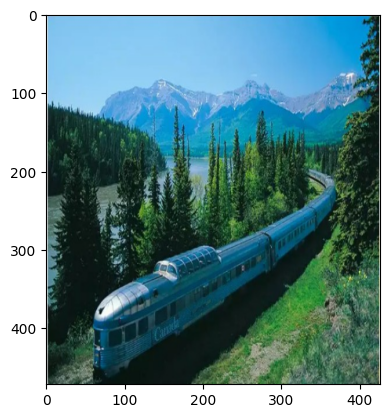

In [8]:
plt.imshow(img)
plt.show()

In [10]:
X = img.reshape((-1,3))
print(X.shape)

(201072, 3)


In [39]:
k =     10
model = KMeans(n_clusters=k)
model.fit(X)

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [40]:
centroids = model.cluster_centers_


In [41]:
print(centroids)

[[231.13419762 240.19621584 239.75683252]
 [ 66.87946834 113.14825053  73.51438958]
 [ 19.2024032  150.35843347 205.88562528]
 [ 11.23663635  30.49920217  24.29186612]
 [136.34229681 198.74979782 239.76115379]
 [107.36335521 141.02217696 119.63732368]
 [ 23.1922907  121.45085045 151.8884471 ]
 [ 12.73025683  74.30112622  91.6333608 ]
 [ 94.86814832 166.625      216.69766237]
 [ 31.79232335  66.67016062  50.41011236]]


In [42]:
colors = np.array(centroids, dtype='uint8')
colors   # 4 most dominant colors

array([[231, 240, 239],
       [ 66, 113,  73],
       [ 19, 150, 205],
       [ 11,  30,  24],
       [136, 198, 239],
       [107, 141, 119],
       [ 23, 121, 151],
       [ 12,  74,  91],
       [ 94, 166, 216],
       [ 31,  66,  50]], dtype=uint8)

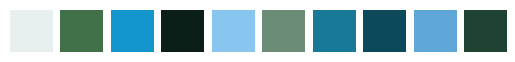

In [43]:
## Color Swatches
i = 1
for color in colors:
    plt.subplot(1,k,i)
    plt.axis("off")
    i = i+1
    mat = np.zeros((100,100,3), dtype='uint8')
    mat[:,:,:] = color
    #mat[:,:,1] = 100
    plt.imshow(mat)
plt.show()

In [44]:
# Basic Segmentation based upon similar color regions
# Segmentation partitions an image into regions
# having similar visual appearance corresponding to parts of objects.

np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [46]:
newImg = np.zeros((X.shape), dtype='uint8')
print(newImg.shape)

(201072, 3)


In [47]:
for i in range(newImg.shape[0]):
    newImg[i] = colors[model.labels_[i]]


In [49]:
newImg = newImg.reshape(img.shape)
print(newImg.shape)

(472, 426, 3)


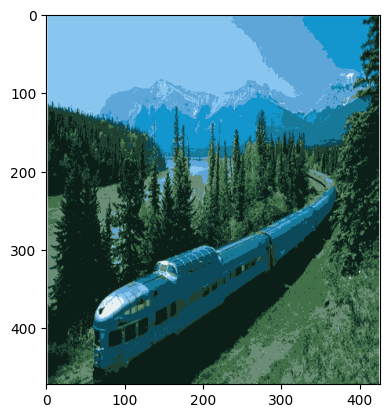

In [50]:
plt.imshow(newImg)